In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRS0z-BpUNElIthEL3DrT5XPoNLO3kaZIHn7yj-trP1nHXPeeDCPvxvGtRl2OEvbgTmgKT5iuZ6u-LZ/pub?gid=714083758&single=true&output=csv")

In [3]:
df

,Academic Year,FE,SE,TE,BE,Male,Female
0,2015-16,63.0,75.0,81.0,88.0,98.0,209.0
1,2016-17,62.0,75.0,60.0,80.0,85.0,192.0
2,2017-18,64.0,69.0,82.0,60.0,91.0,184.0
3,2018-19,62.0,70.0,63.0,89.0,99.0,185.0
4,2019-20,126.0,69.0,74.0,62.0,122.0,209.0
5,2020-21,125.0,125.0,83.0,77.0,195.0,215.0
6,2021-22,NaN,124.0,145.0,82.0,NaN,NaN
7,2022-23,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["FE"][6]=126

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
add=df[["FE","SE","TE","BE"]].sum(axis=1)

In [6]:
add

0    307.0
1    277.0
2    275.0
3    284.0
4    331.0
5    410.0
6    477.0
7      0.0
dtype: float64

In [7]:
add=add[:7]

In [8]:
add=pd.DataFrame(add,columns=["Total"])

In [9]:
add

,Total
0,307.0
1,277.0
2,275.0
3,284.0
4,331.0
5,410.0
6,477.0


In [10]:
final_df=pd.concat([df["Academic Year"],add],axis=1)

In [11]:
final_df

,Academic Year,Total
0,2015-16,307.0
1,2016-17,277.0
2,2017-18,275.0
3,2018-19,284.0
4,2019-20,331.0
5,2020-21,410.0
6,2021-22,477.0
7,2022-23,NaN


In [12]:
final_df.drop(7,inplace=True)

In [13]:
final_df

,Academic Year,Total
0,2015-16,307.0
1,2016-17,277.0
2,2017-18,275.0
3,2018-19,284.0
4,2019-20,331.0
5,2020-21,410.0
6,2021-22,477.0


In [14]:
final_df.describe()

,Total
count,7.000000
mean,337.285714
std,77.585897
min,275.000000
25%,280.500000
50%,307.000000
75%,370.500000
max,477.000000


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Academic Year  7 non-null      object 
 1   Total          7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


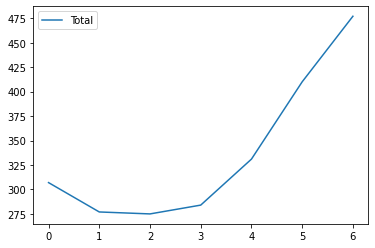

In [16]:
final_df.plot()
plt.show()

In [17]:
def dash(value):
    value = str(value)
    if '-' in value:
        value = value.split('-')[0]
        return int(value)
    else:
        return int(value)

In [18]:
final_df["Academic Year"]=final_df["Academic Year"].apply(dash)

In [19]:
final_df

,Academic Year,Total
0,2015,307.0
1,2016,277.0
2,2017,275.0
3,2018,284.0
4,2019,331.0
5,2020,410.0
6,2021,477.0


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Academic Year  7 non-null      int64  
 1   Total          7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 168.0 bytes


In [21]:
df=final_df

In [22]:
x_train=df[["Academic Year"]]

In [23]:
y_train=df["Total"]

In [24]:
x_train

,Academic Year
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021


In [25]:
y_train

0    307.0
1    277.0
2    275.0
3    284.0
4    331.0
5    410.0
6    477.0
Name: Total, dtype: float64

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

In [27]:
#create, train and do inference of the model
model = RandomForestRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_train)

#calculate MAE
mae = np.round(mean_absolute_error(y_train, predictions), 3) 

In [28]:
mae

11.149

In [29]:
import pickle
import os

with open('Students.pkl', 'wb') as fileWriteStream:
    pickle.dump(model, fileWriteStream)
    fileWriteStream.close()